In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Einasto_profile as ein
from astropy.cosmology import FlatLambdaCDM

In [2]:
import utils

In [45]:
M200m = 3.e14
c200m = 0.2
alpha200m = 0.15
z = 0.7
cosmo = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)

In [46]:
r = np.logspace(-2,5,100)

In [47]:
M200c, c200c, alpha200c = utils.M200m_to_M200c_einasto(M200m, c200m, alpha200m, z)

In [48]:
M200c, c200c, alpha200c

(180976055309188.2, 0.14556860780142447, 0.14999999999645644)

In [49]:
cl_200m = ein.Modeling(M200m, c200m, alpha200m, z, 'mean', cosmo)
cl_200c = ein.Modeling(M200c, c200c, alpha200c, z, 'critical', cosmo)

In [50]:
r = np.logspace(-2,4,100)

In [51]:
rho_200m = cl_200m.density(r)
rho_200c = cl_200c.density(r)

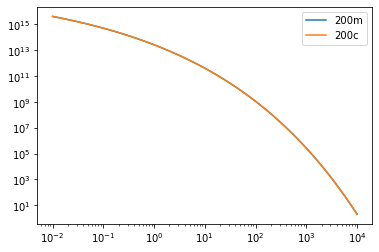

In [59]:
plt.loglog(r, rho_200m, label = '200m')
plt.loglog(r, rho_200c, label = '200c')
plt.legend()